## Chapter 19: Using Random Numbers and Probability Models

The last chapter discussed probability, distributions and random numbers as well as pseudorandom numbers.  In this chapter we will use these ideas to build probability models and answer related questions

In [1]:
using StatsBase, Random
Random.seed!(1234)

TaskLocalRNG()

In [3]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

#### 19.1: Flipping Coins

We can flip 100 coins in a pseudorandom way in julia with

In [3]:
coins = rand(Bool,100)

100-element Vector{Bool}:
 1
 0
 0
 1
 1
 1
 1
 1
 0
 1
 ⋮
 1
 0
 1
 1
 1
 0
 1
 0
 1

This is an array of booleans, but you can interpret this as a 0 for a tails and a 1 for a heads.  We can find the mean of this.  The `mean` method is in the `StatsBase` package.   

In [5]:
sum(coins)

58

In [4]:
mean(coins)

0.58

Flipping a single coin over and over again is not so interesting, but here's how we can flip 3 coins.  Each row denotes a 3-flip event. This is done 100 times. 

In [6]:
coins3 = rand(Bool,100,3)

100×3 Matrix{Bool}:
 1  1  0
 0  0  1
 1  0  0
 0  1  1
 0  1  1
 0  1  0
 1  0  1
 0  0  1
 1  0  0
 0  0  0
 ⋮     
 1  0  1
 0  0  1
 0  0  1
 0  1  0
 1  1  0
 0  1  0
 0  1  0
 0  1  1
 0  1  0

And the following will determine the number of heads flipped by summing along each row: 

In [7]:
heads_sum = mapslices(sum,coins3;dims=[2])

100×1 Matrix{Int64}:
 2
 1
 1
 2
 2
 1
 2
 1
 1
 0
 ⋮
 2
 1
 1
 1
 2
 1
 1
 2
 1

The following counts the number of heads for 0, 1, 2, 3

In [8]:
num_heads = counts(heads_sum,0:3)

4-element Vector{Int64}:
  8
 39
 43
 10

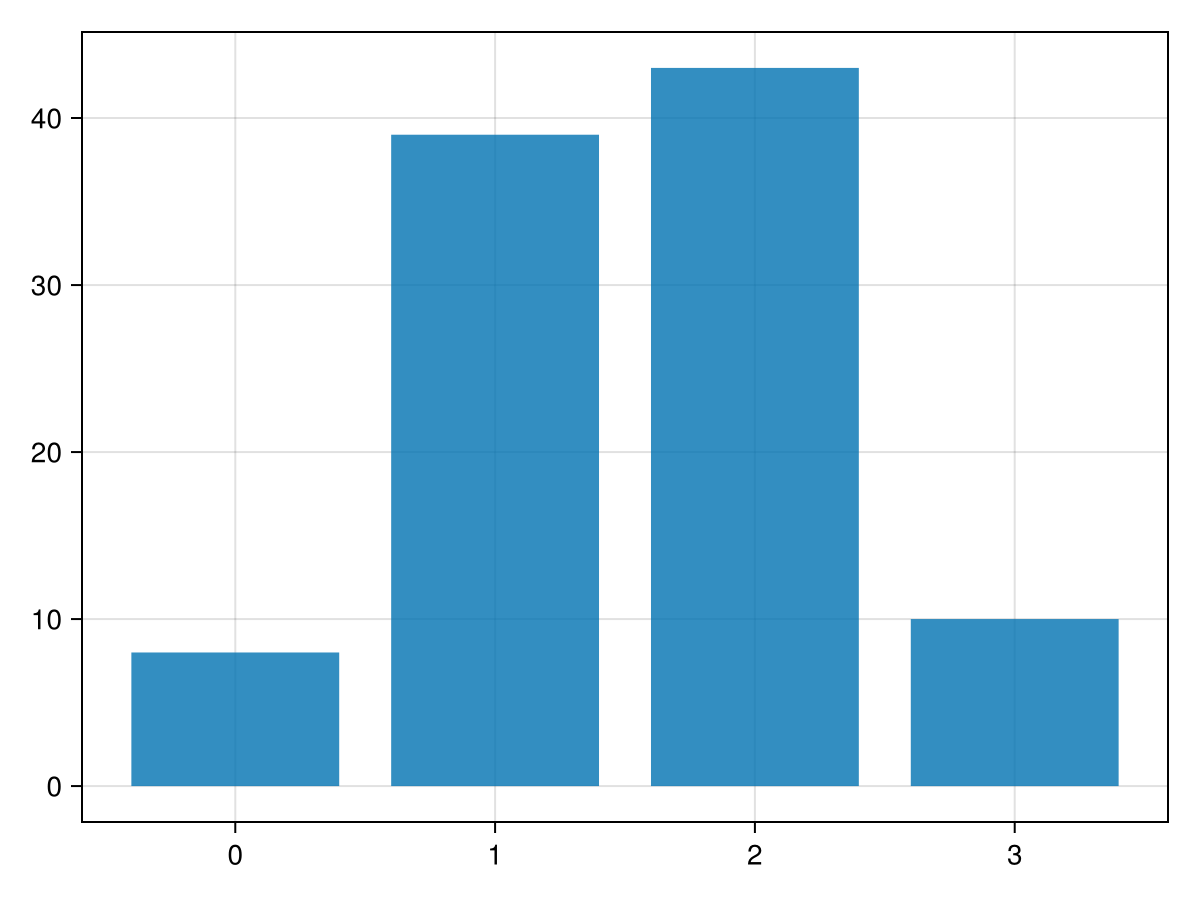

In [9]:
barplot(0:3,num_heads)

Here's a plot of the simulated dice rolls along with the know probability distribution function.  Note: we have turned the number of heads rolled to a fraction so the comparison is equivalent

In [10]:
head_count = num_heads/sum(num_heads)

4-element Vector{Float64}:
 0.08
 0.39
 0.43
 0.1

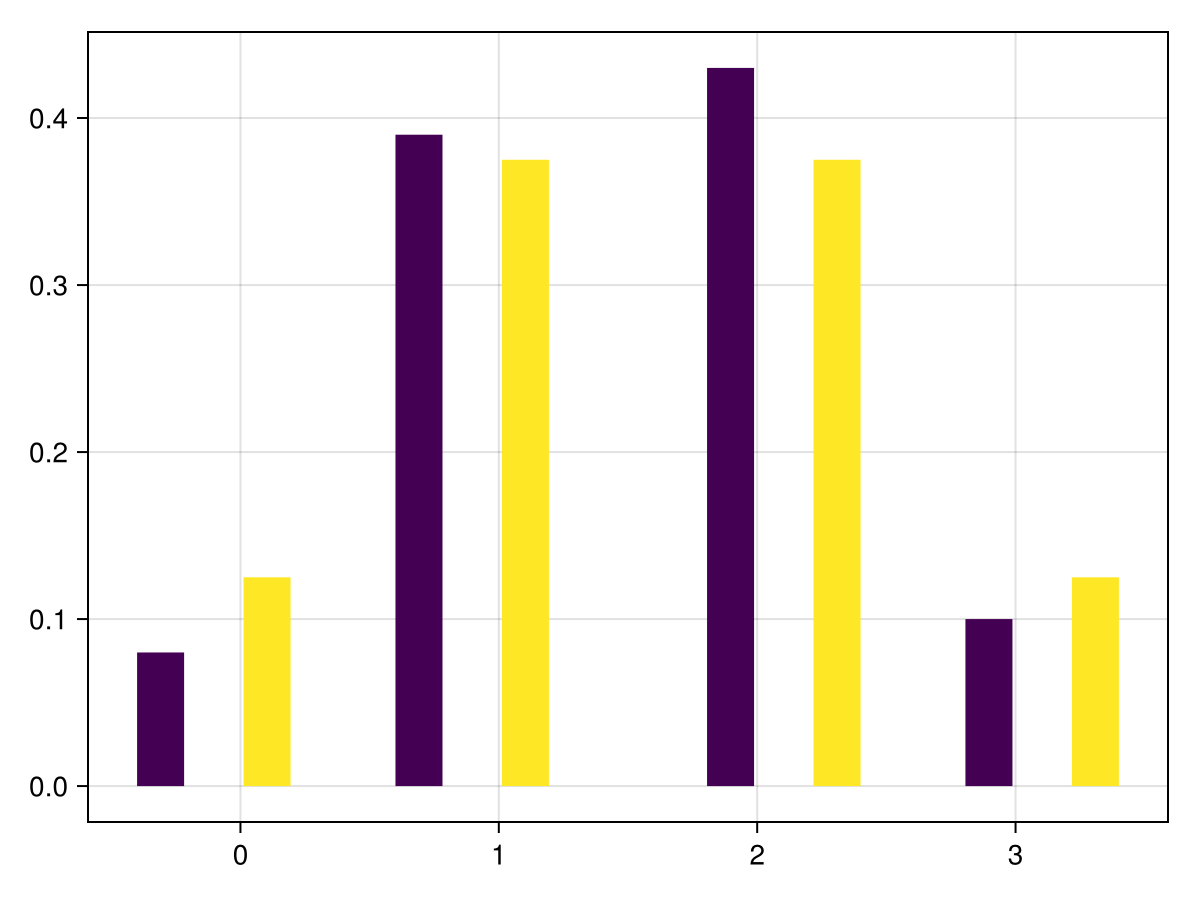

In [14]:
fig = barplot(repeat(0:3,2),vcat(head_count,[1/8, 3/8, 3/8, 1/8]),
  dodge = repeat(1:4,inner = 2), color=repeat(1:2, inner = 4))

This doesn't look very good, so we'll do some fixing of the plot:

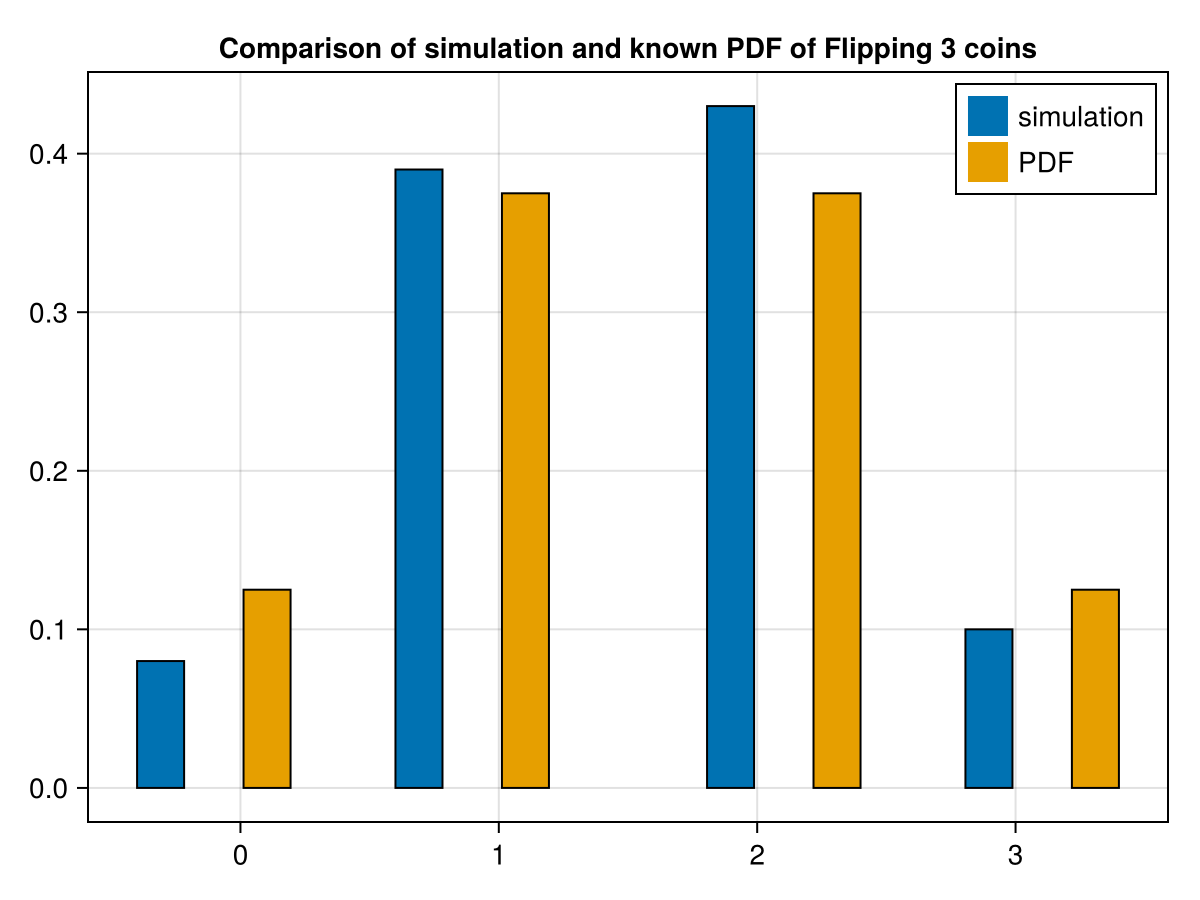

In [15]:
values = 0:3
heights1 = head_count
heights2 = [1/8, 3/8, 3/8, 1/8]
colors = Makie.wong_colors()  # use more attractive colors

fig = Figure()
ax = Axis(fig[1,1], title = "Comparison of simulation and known PDF of Flipping 3 coins", xticks = 0:3)

xvals = repeat(values,2)
heights = vcat(heights1, heights2)


bar = barplot!(ax, xvals, heights, dodge = repeat(1:length(values),inner = 2),
  color=colors[repeat(1:2, inner = length(values))], strokewidth = 1
  )
labels = ["simulation", "PDF"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
axislegend(ax, elements, labels)
fig

#### 19.2: Rolling a die

Last chapter, we saw how to represent the rolling of a single die a larger number of times. Recall that we can roll a single die 100 times with

In [16]:
die100 = rand(1:6,100)

100-element Vector{Int64}:
 5
 4
 5
 1
 2
 3
 5
 6
 4
 6
 ⋮
 3
 3
 1
 5
 2
 5
 4
 2
 5

And if we want to count the number of times each number is rolled:

In [17]:
die_count = counts(die100,1:6)

6-element Vector{Int64}:
 13
 13
 19
 17
 22
 16

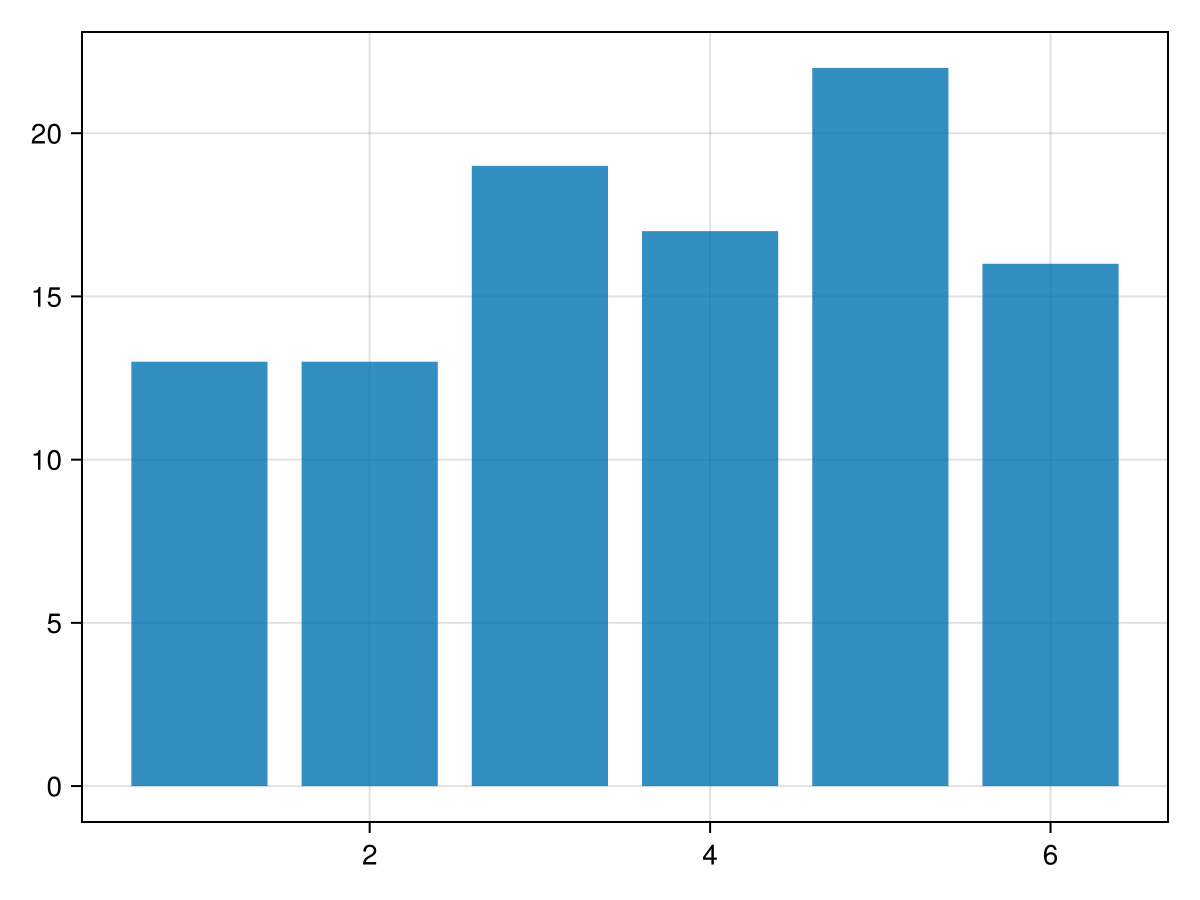

In [20]:
barplot(1:6,die_count)

And we can plot this versus the probability distribution function with:

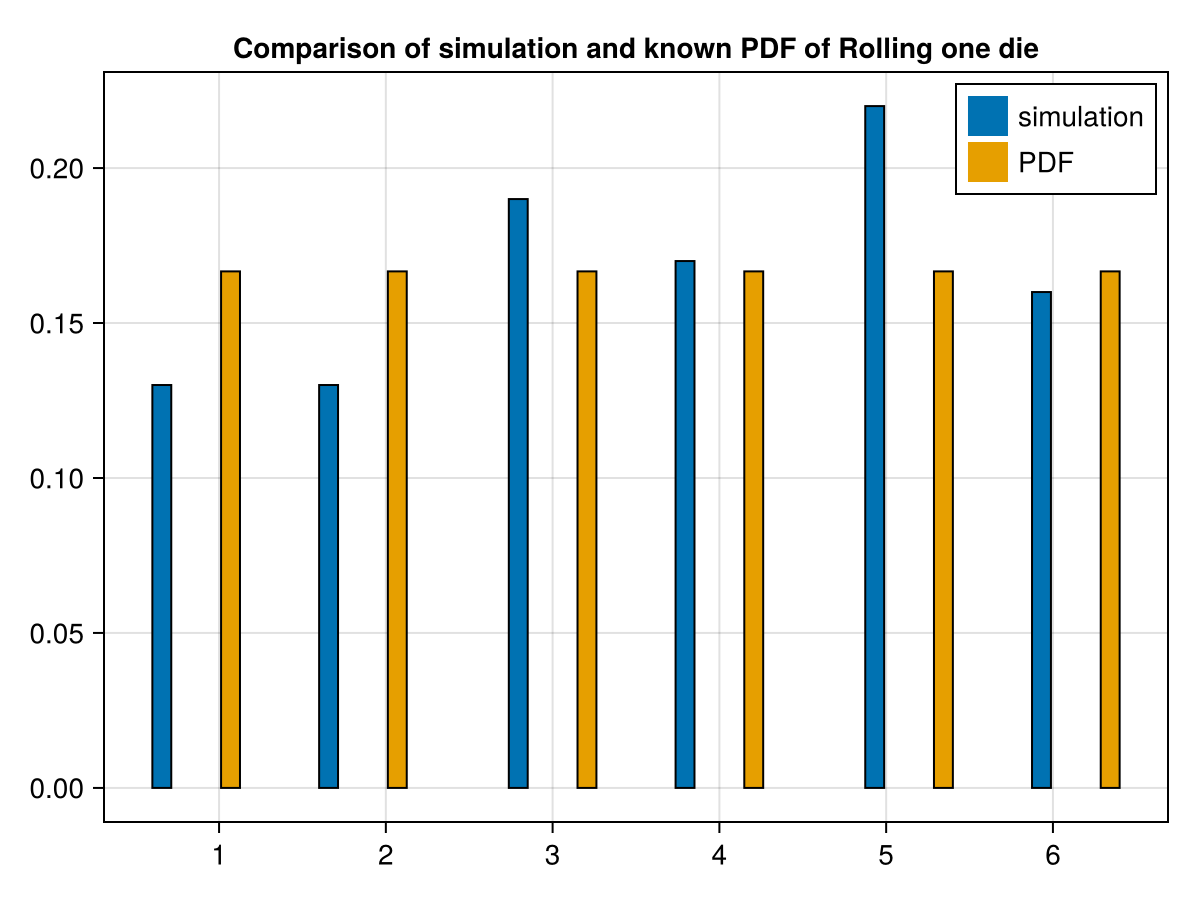

In [19]:
values = 1:6
heights1 = die_count/sum(die_count)
heights2 = [1//6 for i=1:6]
colors = Makie.wong_colors()  # use more attractive colors

fig = Figure()
ax = Axis(fig[1,1], title = "Comparison of simulation and known PDF of Rolling one die", xticks = values)

xvals = repeat(values,2)
heights = vcat(heights1, heights2)


bar = barplot!(ax, xvals, heights, dodge = repeat(1:length(values),inner = 2),
  color=colors[repeat(1:2, inner = length(values))], strokewidth = 1
  )
labels = ["simulation", "PDF"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
axislegend(ax, elements, labels)
fig

### 14.3: Rolling 2 dice

Let's roll 2 dice now and see what happens.  The following will roll 2 dice 10,000 times:

In [21]:
dice2=rand(1:6,10_000,2)

10000×2 Matrix{Int64}:
 5  1
 2  1
 2  1
 3  1
 1  6
 1  1
 6  6
 2  6
 1  3
 2  4
 ⋮  
 2  1
 1  4
 5  3
 6  2
 2  1
 1  1
 5  5
 3  3
 3  2

Sum along the rows:

In [22]:
sum_dice2 = mapslices(sum,dice2, dims=[2])

10000×1 Matrix{Int64}:
  6
  3
  3
  4
  7
  2
 12
  8
  4
  6
  ⋮
  3
  5
  8
  8
  3
  2
 10
  6
  5

In [23]:
dice_count = counts(sum_dice2,2:12)

11-element Vector{Int64}:
  284
  513
  800
 1135
 1443
 1688
 1426
 1103
  840
  519
  249

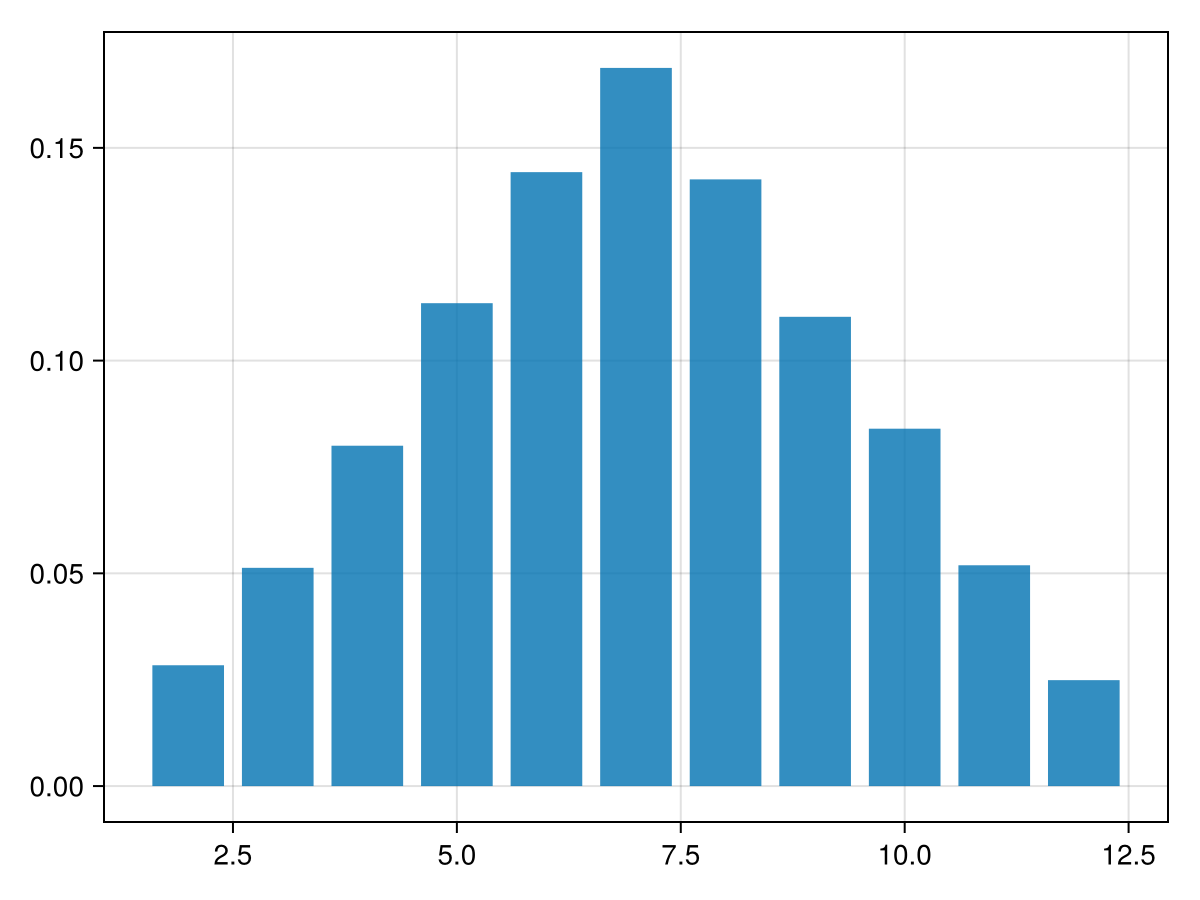

In [24]:
barplot(2:12,dice_count/sum(dice_count))

And here's a plot of the simulation versus the pdf:  (Note copy previous grouped bar plot from above and update values)

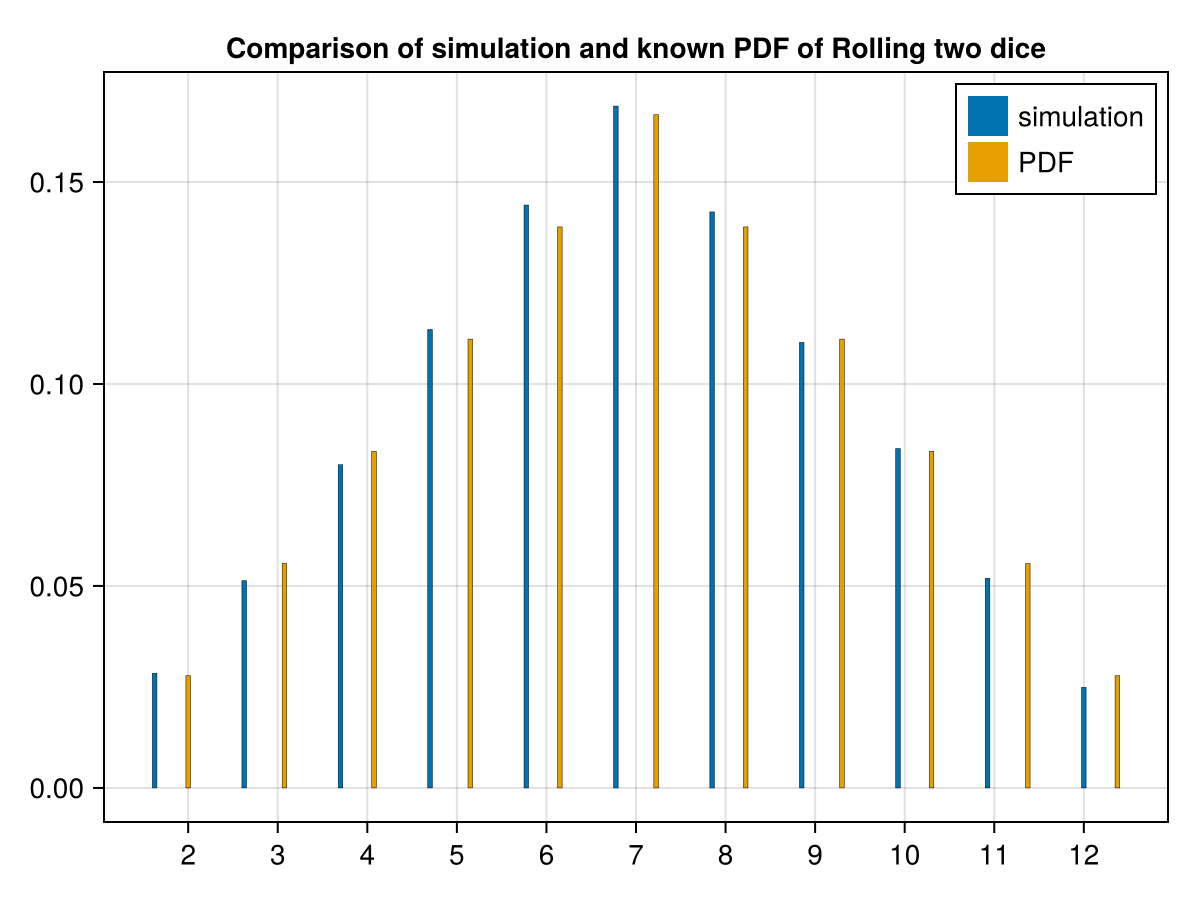

In [26]:
values = 2:12
heights1 = dice_count/sum(dice_count)
heights2 = [(6-abs(i-7))//36 for i=2:12]
colors = Makie.wong_colors()  # use more attractive colors

fig = Figure()
ax = Axis(fig[1,1], title = "Comparison of simulation and known PDF of Rolling two dice", xticks = values)

xvals = repeat(values,2)
heights = vcat(heights1, heights2)


bar = barplot!(ax, xvals, heights, dodge = repeat(1:length(values),inner = 2),
  color=colors[repeat(1:2, inner = length(values))], strokewidth = 0.25
  )
labels = ["simulation", "PDF"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
axislegend(ax, elements, labels)
fig

In [27]:
6^5

7776

We can also ask some interesting questions about probability of dice. 

Here's an estimate of the probability of getting a 7 either using the dice sum vector:

In [28]:
count(x->x==7,sum_dice2)

1688

In [29]:
count(x->x==7,sum_dice2)/length(sum_dice2)

0.1688

From the PDF $P(X=6) = 6/36 = 1/6$

Or directly from the dice count distribution:

In [30]:
dice_count[6]/sum(dice_count)

0.1688

Here's the probability of getting a 10 or more:

In [31]:
count(x->x>=10,sum_dice2)/length(sum_dice2)

0.1608

In [36]:
sum(dice_count[9:end])/sum(dice_count)

0.1608

In [37]:
(dice_count[9]+dice_count[10]+dice_count[11])/sum(dice_count)

0.1608

#### Exercise

1. Estimate the probability of getting 6 or less
2. Estimate the probability of getting an even number.

##### Estimate the probability that you get a pair of the same numbers.

In [40]:
dice2

10000×2 Matrix{Int64}:
 5  1
 2  1
 2  1
 3  1
 1  6
 1  1
 6  6
 2  6
 1  3
 2  4
 ⋮  
 2  1
 1  4
 5  3
 6  2
 2  1
 1  1
 5  5
 3  3
 3  2

In [43]:
sum(mapslices(row -> row[1]==row[2], dice2, dims = [2]))/size(dice2,1)

0.1639

### 19.4: Other Probability Models

Consider the following problem:

A round table has 7 chairs around it. Mary and her friend Alisha and 5 other people are given seats at the table in a random manner. What is the probability that Mary and Alisha sit next to each other?

This problem can be found by finding the total number of arrangements that they sit next to each other and divide by the total number of arrangement.  Instead, we will use simulation to do this:

### Model of sitting at table

In [44]:
names = ["Alisha", "Mary", "p1", "p2", "p3", "p4", "p5"]

7-element Vector{String}:
 "Alisha"
 "Mary"
 "p1"
 "p2"
 "p3"
 "p4"
 "p5"

This function returns a boolean depending on whether or not the friends sit next to each other. 

In [46]:
function nextToEachOther(names::Vector{String})
  a = findfirst(name -> name=="Alisha",names)  # this is the position where Alisha sits
  m = findfirst(name -> name=="Mary",names)    # this is the position where Mary sits
  abs(a-m) == 1 || abs(a-m) == length(names)-1  # return true if either the numbers are 1 away or 6 away
end

nextToEachOther (generic function with 1 method)

Let's check some examples:

In [47]:
findfirst(name -> name == "Alisha", names)

1

In [48]:
findfirst(name -> name == "Mary", names)

2

In [49]:
nextToEachOther(names)

true

In [50]:
nextToEachOther(["Alisha", "Mary", "person1", "person2", "person3", "person4", "person5"])

true

In [51]:
nextToEachOther(["Alisha", "person1", "Mary", "person2", "person3", "person4", "person5"])

false

In [52]:
nextToEachOther(["Alisha","person1", "person2", "person3", "person4", "person5", "Mary"])

true

What we are now going to do is to randomly shuffle the the names and see if the arrangement has the friends sitting next to each other.

This shuffles an array:

In [53]:
shuffle(names)

7-element Vector{String}:
 "p1"
 "p4"
 "p5"
 "Alisha"
 "p2"
 "Mary"
 "p3"

Here's a block of code that tests the arrangents 10,000 times

In [54]:
let
  num_sits = 0
  for i=1:10_000
    if nextToEachOther(shuffle(names))
      num_sits += 1
    end
  end
  num_sits/10_000
end

0.331

We can do the analysis to determine that analytically the answer is 1/3, so this is quite close

### 19.5: Calculating π using pseudo random numbers

#### Buffon's needle experiment

#### Circle in the Square

1. generate points in the square $[0,1]\times[0,1]$.
2. determine the number of points within the unit circle
3. The fraction of points with the unit circle approximates $\pi/4$

In [1]:
pts=rand(100,2);

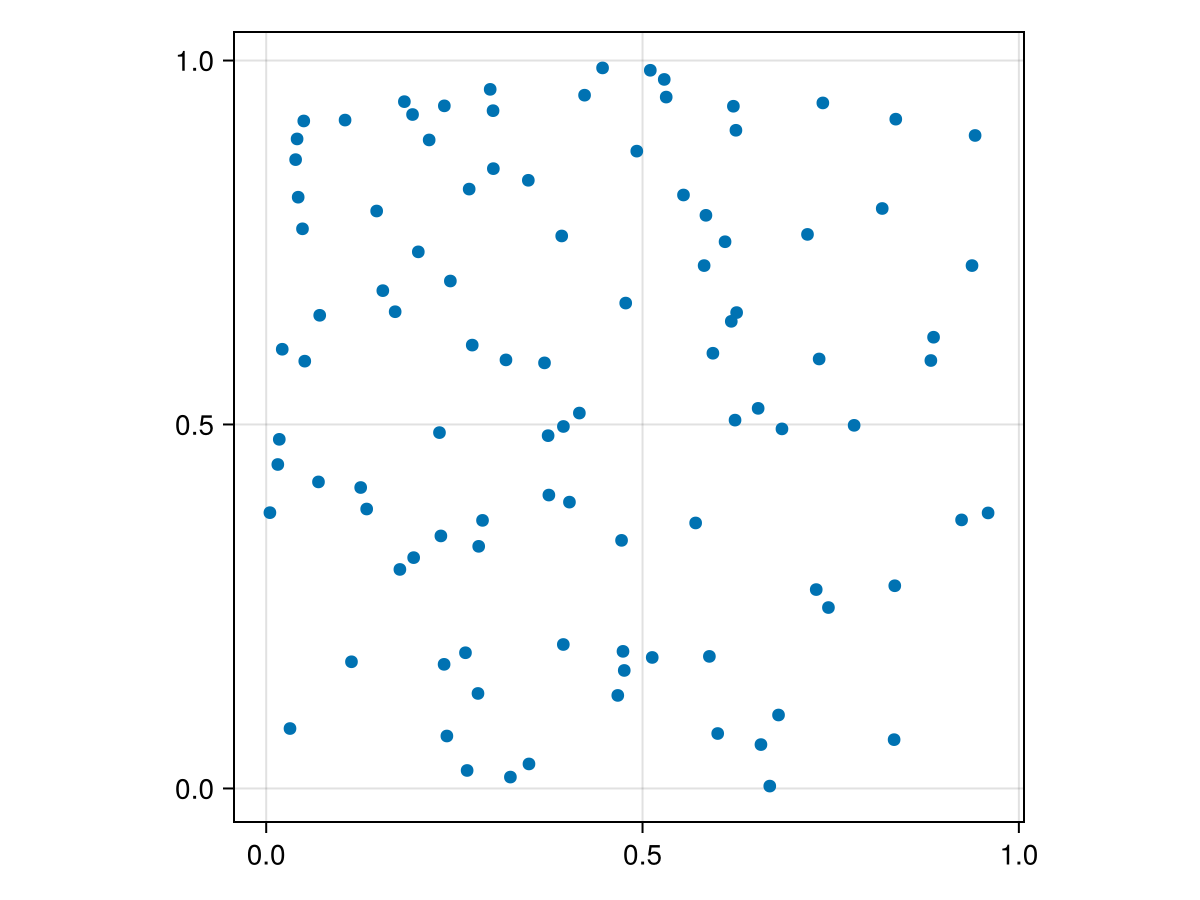

In [4]:
fig = Figure()
ax = Axis(fig[1,1], aspect = 1)
scatter!(ax, pts[:,1],pts[:,2])
fig

Add the circle in the first quadrant to the plot:

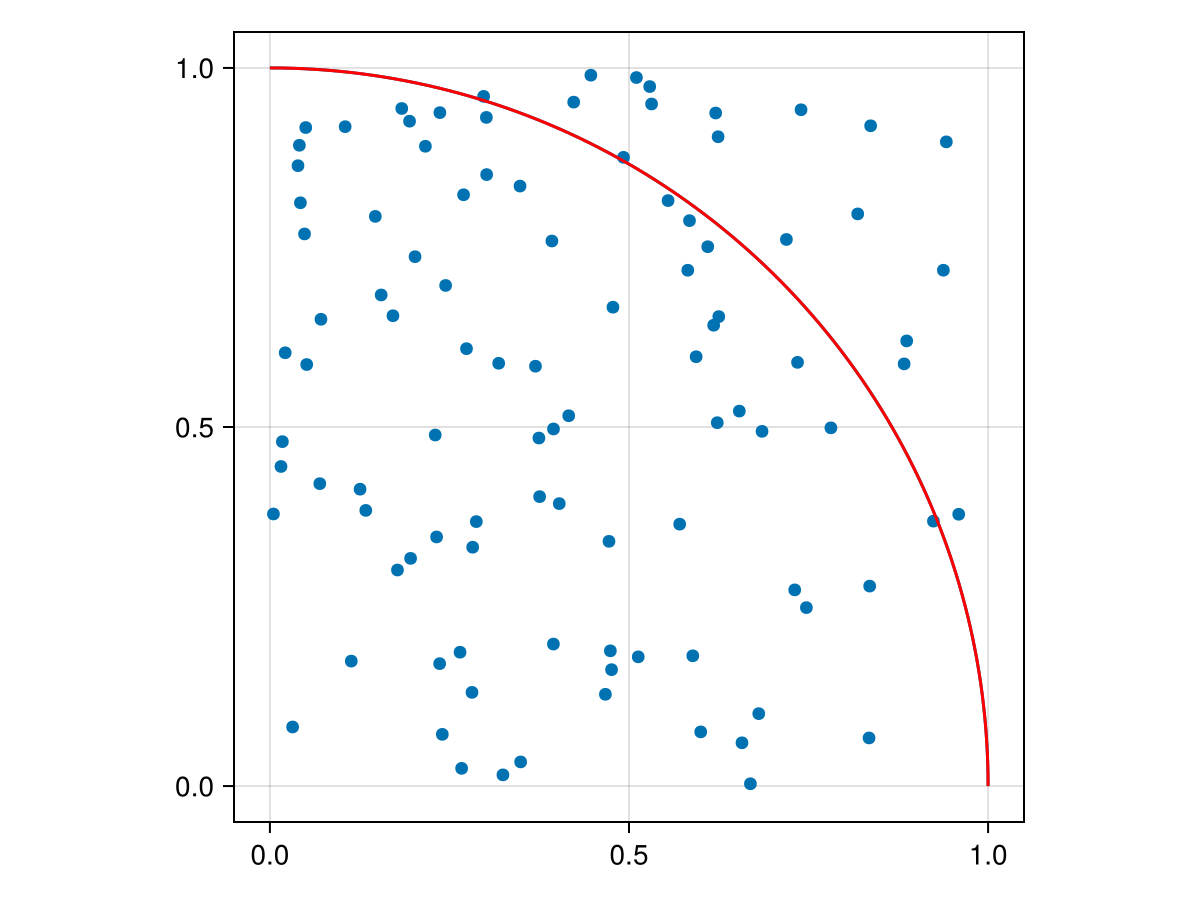

In [6]:
t = LinRange(0,pi/2,100)
lines!(ax,cos.(t), sin.(t), color = :red)
fig

If we increase the number of points that we choose randomly, the answer should tend to $\pi/4$.

First, let's find the distance each point is from the origin:

In [7]:
dist=mapslices(pt->sqrt(pt[1]^2+pt[2]^2),pts;dims=[2])

100×1 Matrix{Float64}:
 0.6046036441505108
 0.8424161547391776
 0.6917507033694951
 0.4799128994473259
 0.9460079582460925
 0.9183056456721566
 1.2429903638939843
 0.9033558622975137
 0.9786469913183974
 1.108331865653667
 ⋮
 0.8365669075591561
 0.660085813882454
 0.9268170933481292
 0.7703176173191624
 0.25063721900961244
 0.6161270193950241
 0.7011894680485478
 1.047146069725639
 0.08816953199391721

In [8]:
inside_circle = count(d -> d<1, dist)

82

So this shows that 82% of the points are within the circle and we can approximate $\pi$ by multiplying the percent by 4. 

In [9]:
inside_circle*4/100

3.28

#### create a function to do this

In [10]:
function calcPi(total_points::Integer)
    pts=rand(total_points,2)
    dist=mapslices(pt->pt[1]^2+pt[2]^2,pts;dims=[2])
    4*count(d->d<1,dist)/total_points
end

calcPi (generic function with 1 method)

In [14]:
@time calcPi(10_000)

  0.000100 seconds (28 allocations: 235.094 KiB)


3.1408

In [12]:
@time calcPi(10^6)

  0.018448 seconds (28 allocations: 22.889 MiB, 45.34% gc time)


3.143732

In [13]:
@time calcPi(10^7)

  0.127938 seconds (28 allocations: 228.883 MiB, 5.61% gc time)


3.142402

not suprisingly, the amount of time it takes was about 10 times as long as the previous, but still only accurate to 2 or 3 decimals. Let's see if we can write a faster function

In [18]:
function calcPi2(total_points::Integer)
  local inside_circle = 0 # keep track of points inside unit circle
  for i=1:total_points
    if rand()^2 + rand()^2 < 1
        inside_circle +=1
    end
  end
  inside_circle*4/total_points
end

calcPi2 (generic function with 1 method)

In [19]:
rand()

0.1826799464927169

In [20]:
@time calcPi2(10^7)

  0.035580 seconds


3.140538

In [21]:
@time calcPi2(10^8)

  0.367715 seconds


3.14160612

In [22]:
@time calcPi2(10^9)

  3.557406 seconds


3.141516036

How long would it take to calculuate $\pi$ to 100 decimal places using this method?

In [24]:
3.6 * big(10)^96/60/60/24/365

1.141552511415525142319204074712241005165694269173523909183155758498224251648905e+89